In [1]:
import tensorflow as tf

In [2]:
import numpy as np


In [3]:
import matplotlib.pyplot as plt

In [4]:
features = 10
neurons = 3

In [5]:
x = tf.placeholder(tf.float32,(None,features))

In [6]:
theta = tf.Variable(tf.random_normal([features,neurons]))

In [7]:
sess = tf.InteractiveSession()

In [8]:
bias = tf.Variable(tf.ones([neurons]))


In [9]:
z_temp = tf.matmul(x,theta)

In [10]:
z = tf.add(z_temp,bias)

In [11]:
act_fn = tf.sigmoid(z)

In [12]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
  sess.run(init)
  result = sess.run(act_fn,feed_dict={x:np.random.random([1,features])})

In [13]:
print(result)

[[0.91413826 0.2620608  0.94319963]]


In [14]:
x_train = np.linspace(0,10,20) + np.random.uniform(-1.5,1.5,20)
x_train

array([ 1.13735667,  1.58113244,  0.34129539,  1.25986816,  1.86008917,
        2.65470745,  2.15177963,  4.52050573,  5.10651248,  4.72462652,
        4.86001273,  6.88020583,  5.25417768,  7.54457976,  7.35316947,
        8.11133025,  7.64751272,  7.56764727, 10.50317649, 10.33208555])

In [15]:
y_train = np.linspace(0,10,20) + np.random.uniform(-1.5,1.5,20)
init = tf.global_variables_initializer()
with tf.Session() as sess:
  sess.run(init)
y_train

array([ 0.16862218,  1.23605355,  2.10207295,  0.27534614,  2.69627275,
        3.8695628 ,  3.28729039,  4.39292722,  5.16332723,  5.46071331,
        5.70074146,  6.60874966,  7.08417354,  7.85480716,  6.75611311,
        8.60433091,  8.19298626,  8.11085171, 10.79015737,  9.94869732])

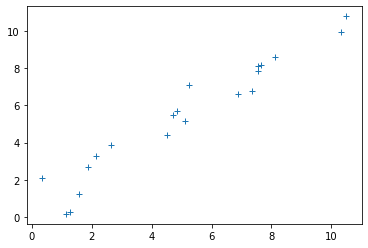

In [16]:
plt.plot(x_train,y_train,'+')

In [17]:
theta = tf.Variable(.44)
b = tf.Variable(.87)

In [18]:
error = 0
for x,y in zip(x_train,y_train):
  z = theta*x
  print(z)
  error = error + ((y-z)**2)
  print(error)


Tensor("mul:0", shape=(), dtype=float32)
Tensor("add_1:0", shape=(), dtype=float32)
Tensor("mul_1:0", shape=(), dtype=float32)
Tensor("add_2:0", shape=(), dtype=float32)
Tensor("mul_2:0", shape=(), dtype=float32)
Tensor("add_3:0", shape=(), dtype=float32)
Tensor("mul_3:0", shape=(), dtype=float32)
Tensor("add_4:0", shape=(), dtype=float32)
Tensor("mul_4:0", shape=(), dtype=float32)
Tensor("add_5:0", shape=(), dtype=float32)
Tensor("mul_5:0", shape=(), dtype=float32)
Tensor("add_6:0", shape=(), dtype=float32)
Tensor("mul_6:0", shape=(), dtype=float32)
Tensor("add_7:0", shape=(), dtype=float32)
Tensor("mul_7:0", shape=(), dtype=float32)
Tensor("add_8:0", shape=(), dtype=float32)
Tensor("mul_8:0", shape=(), dtype=float32)
Tensor("add_9:0", shape=(), dtype=float32)
Tensor("mul_9:0", shape=(), dtype=float32)
Tensor("add_10:0", shape=(), dtype=float32)
Tensor("mul_10:0", shape=(), dtype=float32)
Tensor("add_11:0", shape=(), dtype=float32)
Tensor("mul_11:0", shape=(), dtype=float32)
Tensor("a

In [19]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=.001)
train = optimizer.minimize(error)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [24]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
  sess.run(init)
  epochs = 10

  for h in range(epochs):
    sess.run(train)
  weight,bias = sess.run([theta,b])
  print(weight)
  print(bias)

1.0418655
0.87


In [25]:
x_test = np.linspace(-1,11,20)

prediction = (weight * x_test + bias)
print(prediction)

[-0.17186546  0.48615483  1.14417513  1.80219542  2.46021572  3.11823601
  3.77625631  4.43427661  5.0922969   5.7503172   6.40833749  7.06635779
  7.72437808  8.38239838  9.04041868  9.69843897 10.35645927 11.01447956
 11.67249986 12.33052015]


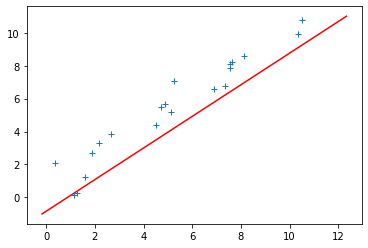

In [26]:
plt.plot(prediction,x_test,'r')
plt.plot(x_train,y_train,'+')